In [1]:
################################################################################
#
#   1.11.1: Finding and drawing contours   
#
################################################################################

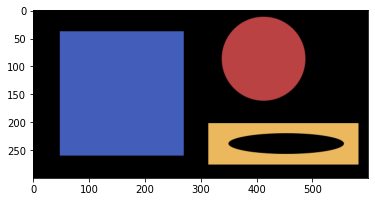

Found 4 contours


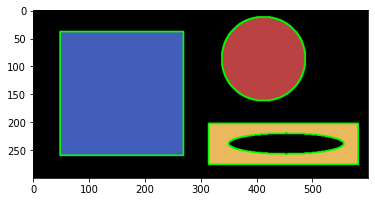

In [65]:
# import the necessary packages
import cv2
import numpy as np
import imutils
from matplotlib import pyplot as plt

# load the image and convert it to grayscale
image  = cv2.imread("basic_shapes.png")
RGB_im = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray   = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# show the original image
plt.imshow(RGB_im)
plt.show()

# find all contours in the image and draw ALL contours on the image
cnts  = cv2.findContours(gray.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cntss = imutils.grab_contours(cnts) # list of the contours found

clone = RGB_im.copy()

cnts2draw     = -1 # list index of the contour to draw. Use -1 to draw them all
cnt_colour    = (0 , 255, 0 ) # green
cnt_thickness = 2             # pixels

cv2.drawContours(clone, cntss, cnts2draw, cnt_colour, cnt_thickness)

print(f'''Found {len(cntss)} contours''')

# show the output image
plt.imshow(clone)
plt.show()

Drawing contour #1


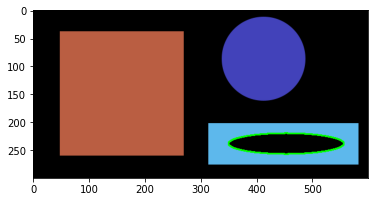

Drawing contour #2


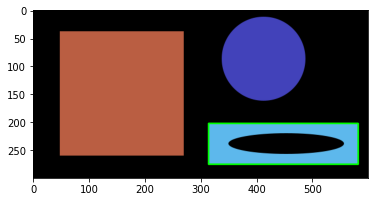

Drawing contour #3


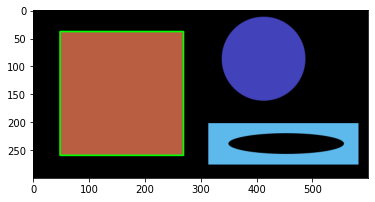

Drawing contour #4


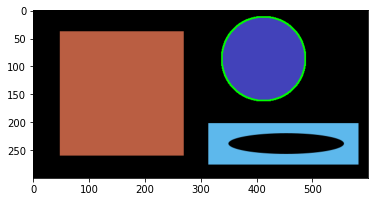

In [18]:
# re-clone the image and close all open windows
clone = RGB_im.copy()

# loop over the contours individually and draw each of them
for (i, c) in enumerate(cntss):
  clone = image.copy()	
  print(f'''Drawing contour #{i+1}''')
  cv2.drawContours(clone, [c], -1, (0, 255, 0), 2)
  plt.imshow(clone)
  plt.show()

Found 4 contours


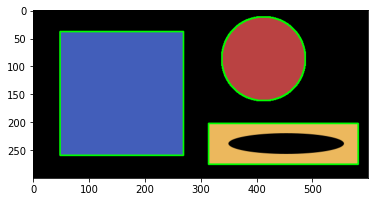

In [21]:
#-------------------------------------------------------------------------------
#  How to skip the inner contours?   Use: 
#-------------------------------------------------------------------------------

# find all contours in the image and draw ALL contours on the image
cnts  = cv2.findContours(gray.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#cnts = cv2.findContours(gray.copy(), cv2.RETR_LIST,     cv2.CHAIN_APPROX_SIMPLE)

cnts = imutils.grab_contours(cnts) # list of the contours found

clone = RGB_im.copy()

cnts2draw     = -1 # list index of the contour to draw. Use -1 to draw them all
cnt_colour    = (0 , 255, 0 ) # green
cnt_thickness = 2             # pixels

cv2.drawContours(clone, cnts, cnts2draw, cnt_colour, cnt_thickness)

print(f'''Found {len(cntss)} contours''')

# show the output image
plt.imshow(clone)
plt.show()

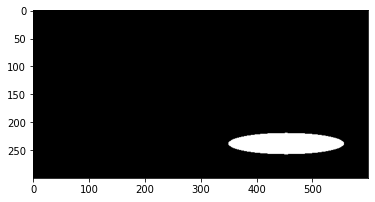

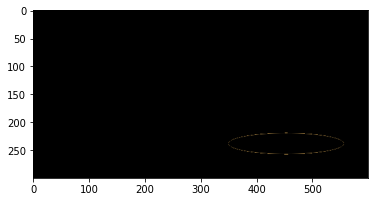

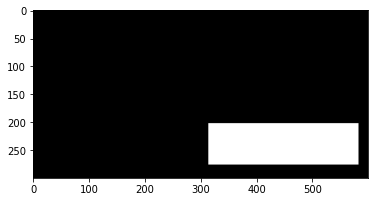

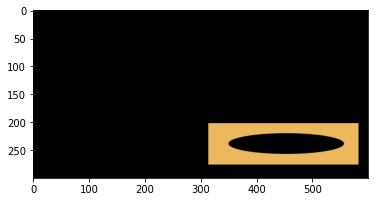

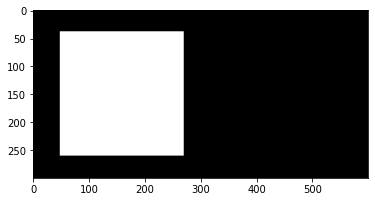

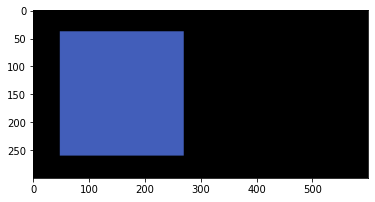

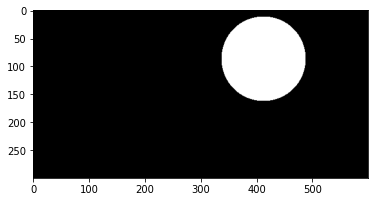

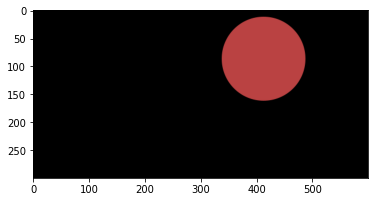

In [30]:
#-------------------------------------------------------------------------------
#  Figure Isolation
#-------------------------------------------------------------------------------

# re-clone the image and close all open windows
clone = RGB_im.copy()

cnts2draw     = -1  # Draw them all
cnt_colour    = 255 # white
cnt_thickness = -1  # fill all the area

# loop over the contours individually
for c in cntss:
	# construct a mask by drawing only the current contour
	our_mask = np.zeros(gray.shape, dtype="uint8")
	cv2.drawContours(our_mask, [c], cnts2draw, cnt_colour, cnt_thickness)
 	
	# show the images
	plt.imshow(cv2.cvtColor(our_mask , cv2.COLOR_BGR2RGB))
	plt.show()
	plt.imshow( cv2.cvtColor(cv2.bitwise_and(image, image, mask=our_mask) , cv2.COLOR_BGR2RGB))
	plt.show()

In [ ]:
################################################################################
#
#   1.11.2: Simple Contour Properties
#
################################################################################

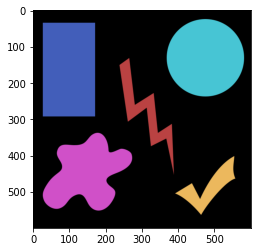

In [42]:
# load the image and convert it to grayscale
image = cv2.imread("more_shapes.png")
gray  = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# show the original image
plt.imshow(cv2.cvtColor(image , cv2.COLOR_BGR2RGB))
plt.show()

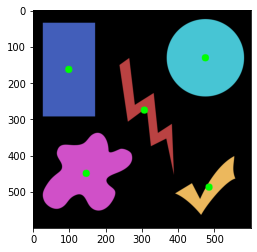

In [43]:
#-------------------------------------------------------------------------------
#  Centroid / center of mass
# ------------------------------------------------------------------------------
# 
# find external contours in the image
cnts = cv2.findContours(gray.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
clone = image.copy()

# loop over the contours
for c in cnts:
	# compute the moments of the contour which can be used to compute the
	# centroid or "center of mass" of the region
	M = cv2.moments(c)
	cX = int(M["m10"] / M["m00"])
	cY = int(M["m01"] / M["m00"])
 
	# draw the center of the contour on the image
	cv2.circle(clone, (cX, cY), 10, (0, 255, 0), -1)


# show the output image
plt.imshow(cv2.cvtColor(clone , cv2.COLOR_BGR2RGB))
plt.show()
clone = cv2.cvtColor(image , cv2.COLOR_BGR2RGB).copy()

Contour #1 -- area: 8049.50, perimeter: 577.39
Contour #2 -- area: 30873.00, perimeter: 893.32
Contour #3 -- area: 10435.50, perimeter: 1038.54
Contour #4 -- area: 36751.00, perimeter: 800.00
Contour #5 -- area: 35702.00, perimeter: 705.07


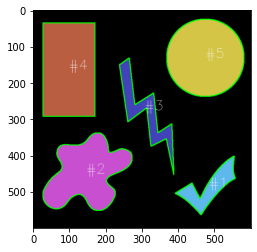

In [44]:
#-------------------------------------------------------------------------------
#  Area and Perimeter
# ------------------------------------------------------------------------------
#
#  loop over the contours again
for (i, c) in enumerate(cnts):
	# compute the area and the perimeter of the contour
	area      = cv2.contourArea(c)
	perimeter = cv2.arcLength(c, True)
 
	print(f'''Contour #{i+1} -- area: {area:.2f}, perimeter: {perimeter:.2f}''')
	
  # draw the contour on the image
	cv2.drawContours(clone, [c], -1, (0, 255, 0), 2)
	
  # compute the center of the contour and draw the contour number
	M = cv2.moments(c)
	cX = int(M["m10"] / M["m00"])
	cY = int(M["m01"] / M["m00"])
	cv2.putText(clone, f'''#{(i + 1)}''', (cX, cY), cv2.FONT_HERSHEY_SIMPLEX,
		1.25, (255, 255, 255), 1)

# show the output image
plt.imshow(cv2.cvtColor(clone , cv2.COLOR_BGR2RGB))
plt.show()

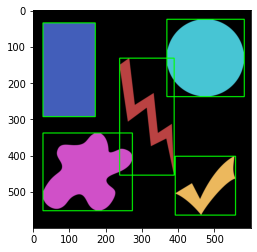

In [45]:
#-------------------------------------------------------------------------------
#  Bounding Boxes
# ------------------------------------------------------------------------------
#
# clone the original image
clone = image.copy()

# loop over the contours
for c in cnts:
	# fit a bounding box to the contour
	(x, y, w, h) = cv2.boundingRect(c)
	cv2.rectangle(clone, (x, y), (x + w, y + h), (0, 255, 0), 2)

# show the output image
plt.imshow(cv2.cvtColor(clone , cv2.COLOR_BGR2RGB))
plt.show()

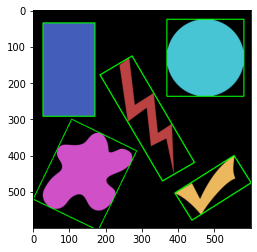

In [46]:
#-------------------------------------------------------------------------------
#  Bounding Boxes - Rotated
# ------------------------------------------------------------------------------

clone = image.copy()

# loop over the contours
for c in cnts:
	# fit a rotated bounding box to the contour and draw a rotated bounding box
	box = cv2.minAreaRect(c)
	box = np.int0(cv2.cv.BoxPoints(box) if imutils.is_cv2() else cv2.boxPoints(box))
	cv2.drawContours(clone, [box], -1, (0, 255, 0), 2)

# show the output image
plt.imshow(cv2.cvtColor(clone , cv2.COLOR_BGR2RGB))
plt.show()

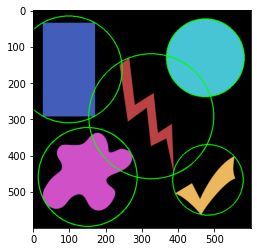

In [47]:
#-------------------------------------------------------------------------------
#  Minimun enclosing circles
# ------------------------------------------------------------------------------

clone = image.copy()

# loop over the contours
for c in cnts:
	# fit a minimum enclosing circle to the contour
	((x, y), radius) = cv2.minEnclosingCircle(c)
	cv2.circle(clone, (int(x), int(y)), int(radius), (0, 255, 0), 2)

# show the output image
plt.imshow(cv2.cvtColor(clone , cv2.COLOR_BGR2RGB))
plt.show()

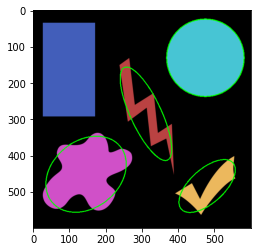

In [48]:
#-------------------------------------------------------------------------------
#  Fitting an Ellipse
# ------------------------------------------------------------------------------

clone = image.copy()

# loop over the contours
for c in cnts:
	# to fit an ellipse, our contour must have at least 5 points
	if len(c) >= 5:
		# fit an ellipse to the contour
		ellipse = cv2.fitEllipse(c)
		cv2.ellipse(clone, ellipse, (0, 255, 0), 2)

# show the output image
plt.imshow(cv2.cvtColor(clone , cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
################################################################################
#
#   1.11.3: Advanced contour properties 
#
################################################################################


<h2> Extent </h2>

$ extent = \frac{shape \ area}{bounding \ box \ area}$

It will always be < 1




---



<h2> Convex Hull </h2>

$ extent = \frac{shape \ area}{bounding \ box \ area}$

I like to think of a convex hull as a super elastic rubber band to bundle together a bunch of mail envelopes.

---

<h2> Solidity </h2>

$ solidity = \frac{contour \ area}{convex \ hull \ area}$


It will always be < 1 

O (Contour #1) -- solidity = 0.98
X (Contour #2) -- solidity = 0.60
O (Contour #3) -- solidity = 0.98
X (Contour #4) -- solidity = 0.60
X (Contour #5) -- solidity = 0.60
O (Contour #6) -- solidity = 0.98
? (Contour #7) -- solidity = 0.28


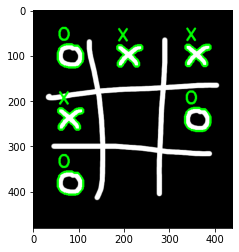

In [49]:
#-------------------------------------------------------------------------------
#  Tic Tac Toe
# ------------------------------------------------------------------------------

# load the tic-tac-toe image and convert it to grayscale
image = cv2.imread("tictactoe.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# find all contours on the tic-tac-toe board
cnts = cv2.findContours(gray.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

# loop over the contours
for (i, c) in enumerate(cnts):
	
  # compute the area of the contour along with the bounding box
	# to compute the aspect ratio
	area = cv2.contourArea(c)
	(x, y, w, h) = cv2.boundingRect(c)
	
  # compute the convex hull of the contour, then use the area of the
	# original contour and the area of the convex hull to compute the
	# solidity
	hull = cv2.convexHull(c)
	hullArea = cv2.contourArea(hull)
	solidity = area / float(hullArea)
  
  # initialize the character text
	char = "?"

	# if the solidity is high, then we are examining an `O`
	if solidity > 0.9:
		char = "O"
	# otherwise, if the solidity it still reasonabably high, we
	# are examining an `X`
	elif solidity > 0.5:
		char = "X"

	# if the character is not unknown, draw it
	if char != "?":
		cv2.drawContours(image, [c], -1, (0, 255, 0), 3)
		cv2.putText(image, char, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.25,	(0, 255, 0), 4)
  
	# show the contour properties
	print(f'''{char} (Contour #{i+1}) -- solidity = {solidity:.2f}''')
 
# show the output image
plt.imshow(cv2.cvtColor(image , cv2.COLOR_BGR2RGB))
plt.show()

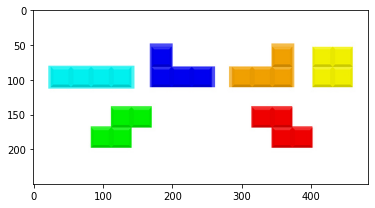

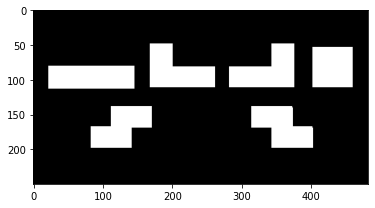

In [51]:
#-------------------------------------------------------------------------------
#  Tetris block identifier
# ------------------------------------------------------------------------------
#
#  load the Tetris block image, convert it to grayscale, and threshold the image
image = cv2.imread("tetris_blocks.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV)[1]

# show the original and thresholded images
plt.imshow(cv2.cvtColor(image , cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(thresh , cv2.COLOR_BGR2RGB))
plt.show()

# find external contours in the thresholded image and allocate memory
# for the convex hull image
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
hullImage = np.zeros(gray.shape[:2], dtype="uint8")

Contour #1 -- aspect_ratio=1.48, extent=0.66, solidity=0.81
Contour #2 -- aspect_ratio=1.47, extent=0.65, solidity=0.80
Contour #3 -- aspect_ratio=3.76, extent=0.96, solidity=1.00
Contour #4 -- aspect_ratio=1.00, extent=0.97, solidity=1.00
Contour #5 -- aspect_ratio=1.49, extent=0.63, solidity=0.79
Contour #6 -- aspect_ratio=1.49, extent=0.63, solidity=0.79


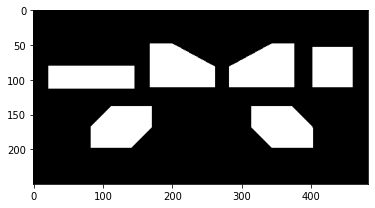

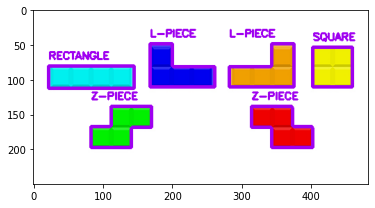

In [53]:
# loop over the contours
for (i, c) in enumerate(cnts):

	# compute the area and bounding box
	area = cv2.contourArea(c)
	(x, y, w, h) = cv2.boundingRect(c)
 
	# compute the aspect ratio: w/h of the bounding box
	aspectRatio = w / float(h)
 
	# compute extent
	extent = area / float(w * h)
 
	# compute the convex hull, then use the area of the original
	# contour and the area of the convex hull to compute the solidity
	hull = cv2.convexHull(c)
	hullArea = cv2.contourArea(hull)
	solidity = area / float(hullArea)
 
	# visualize the original contours and the convex hull and initialize
	# the name of the shape
	cv2.drawContours(hullImage, [hull], -1, 255, -1)
	cv2.drawContours(image, [c], -1, (240, 0, 159), 3)
	shape = ""

  # if the aspect ratio is approximately one, then the shape is a square
	if aspectRatio >= 0.98 and aspectRatio <= 1.02:
		shape = "SQUARE"
	# if the width is 3x longer than the height, then we have a rectangle
	elif aspectRatio >= 3.0:
		shape = "RECTANGLE"
	# if the extent is sufficiently small, then we have a L-piece
	elif extent < 0.65:
		shape = "L-PIECE"
	# if the solidity is sufficiently large enough, then we have a Z-piece
	elif solidity > 0.80:
		shape = "Z-PIECE"

	# draw the shape name on the image
	cv2.putText(image, shape, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
		(240, 0, 159), 2)
 
	# show the contour properties
	print("Contour #{} -- aspect_ratio={:.2f}, extent={:.2f}, solidity={:.2f}"
		.format(i + 1, aspectRatio, extent, solidity))
 
# show the output images
plt.imshow(cv2.cvtColor(hullImage , cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(image , cv2.COLOR_BGR2RGB))
plt.show()

# Contour approximation


---


It's an algorithm for reducing the number of points in a curve with a reduced set of points — thus, an approximation. This algorithm is commonly known as the Ramer-Douglas-Peucker algorithm, or simply: the split-and-merge algorithm.

The general assumption of this algorithm is that a curve can be approximated by a series of short line segments. And we can thus approximate a given number of these line segments to reduce the number of points it takes to construct a curve.

Overall, the resulting approximated curve consists of a subset of points that were defined by the original curve.

The actual algorithm itself is already implemented in OpenCV via the ***cv2.approxPolyDP***    function, so luckily we do not have to implement the algorithm by hand. However, the recursive algorithm is fairly straightforward and I would definitely suggest giving the excellent Wikipedia article on the approximation algorithm a quick read.

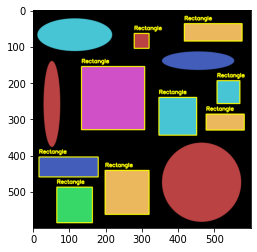

In [54]:
# load the the cirles and squares image and convert it to grayscale
image = cv2.imread("circles_and_squares.png")
gray  = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# find contours in the image
cnts = cv2.findContours(gray.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

# loop over the contours
for c in cnts:

	# approximate the contour
	peri   = cv2.arcLength(c, True)
	approx = cv2.approxPolyDP(c, 0.01 * peri, True)
 
	# if the approximated contour has 4 vertices, then its a rectangle
	if len(approx) == 4:
		# draw the outline of the contour and draw the text on the image
		cv2.drawContours(image, [c], -1, (0, 255, 255), 2)
		(x, y, w, h) = cv2.boundingRect(approx)
		cv2.putText(image, "Rectangle", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 255), 2)
  
# show the output image
plt.imshow(cv2.cvtColor(image , cv2.COLOR_BGR2RGB))
plt.show()

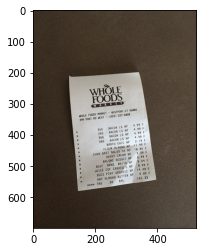

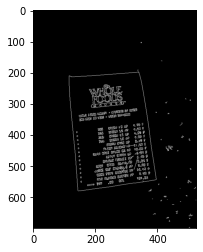

In [55]:
#-------------------------------------------------------------------------------
#  Receipt example
# ------------------------------------------------------------------------------
#
# load the receipt, convert it to grayscale, and detect edges
image = cv2.imread("receipt.png")
#image = imutils.resize(image, height = 500)
orig = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edged = cv2.Canny(gray, 75, 200)

# show the original image and edged map
plt.imshow(cv2.cvtColor(image , cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(edged , cv2.COLOR_BGR2RGB))
plt.show()

original: 279, approx: 4
original: 62, approx: 24
original: 41, approx: 25
original: 18, approx: 18
original: 29, approx: 22
original: 31, approx: 23
original: 26, approx: 24


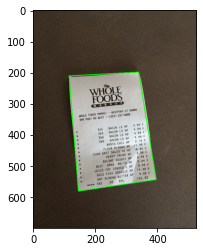

In [56]:
# find contours in the image and sort them from largest to smallest,
# keeping only the largest ones
cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)[:7]

# loop over the contours
for c in cnts:
	# approximate the contour and initialize the contour color
	peri = cv2.arcLength(c, True)
	approx = cv2.approxPolyDP(c, 0.01 * peri, True)
 
	# show the difference in number of vertices between the original
	# and approximated contours
	print("original: {}, approx: {}".format(len(c), len(approx)))
 
	# if the approximated contour has 4 vertices, then we have found our rect
	if len(approx) == 4:
		# draw the outline on the image
		cv2.drawContours(image, [approx], -1, (0, 255, 0), 2)
  
# show the output image
plt.imshow(cv2.cvtColor(image , cv2.COLOR_BGR2RGB))
plt.show()

In [60]:
#-------------------------------------------------------------------------------
#  Sorting Contours
# ------------------------------------------------------------------------------
#
# import the necessary packages
import numpy as np
import cv2
import imutils

def sort_contours(cnts, method="left-to-right"):

	# initialize the reverse flag and sort index
	reverse = False
	i = 0

	# handle if we need to sort in reverse
	if method == "right-to-left" or method == "bottom-to-top":
		reverse = True

	# handle if we are sorting against the y-coordinate rather than
	# the x-coordinate of the bounding box
	if method == "top-to-bottom" or method == "bottom-to-top":
		i = 1

	# construct list of bounding boxes and sort them from top to bottom
	boundingBoxes = [cv2.boundingRect(c) for c in cnts]

	(cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
		key=lambda b:b[1][i], reverse=reverse))
 
	# return the list of sorted contours and bounding boxes
	return (cnts, boundingBoxes)

In [61]:
def draw_contour(image, c, i):
	# compute the center of the contour area 
	M = cv2.moments(c)
	cX = int(M["m10"] / M["m00"])
	cY = int(M["m01"] / M["m00"])
	# draw the countour number on the image
	cv2.putText(image, "#{}".format(i + 1), (cX - 20, cY), cv2.FONT_HERSHEY_SIMPLEX,
		1.0, (255, 255, 255), 2)
	# return the image with the contour number drawn on it
	return image

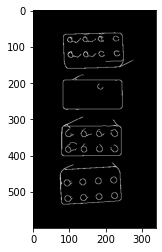

In [62]:
# load the image and initialize the accumulated edge image
image = cv2.imread('lego_blocks_1.png')
accumEdged = np.zeros(image.shape[:2], dtype="uint8")

# loop over the blue, green, and red channels, respectively
for channel in cv2.split(image):
	# blur the channel, extract edges and accumulate the set of edges
  channel = cv2.medianBlur(channel, 11)
  #cv2_imshow(channel)
  edged = cv2.Canny(channel, 50, 200)
  #cv2_imshow(edged)
  accumEdged = cv2.bitwise_or(accumEdged, edged)

# show the accumulated edge map
plt.imshow(cv2.cvtColor(accumEdged , cv2.COLOR_BGR2RGB))
plt.show()

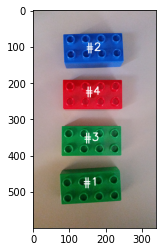

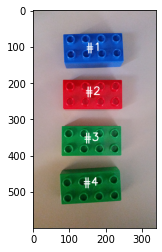

In [63]:
# find contours in the accumulated image, keeping only the largest ones
cnts = cv2.findContours(accumEdged.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)[:5]
orig = image.copy()

# loop over the (unsorted) contours and draw them
for (i, c) in enumerate(cnts):
	orig = draw_contour(orig, c, i)

# show the original, unsorted contour image
plt.imshow(cv2.cvtColor(orig , cv2.COLOR_BGR2RGB))
plt.show()

# sort the contours according to the provided method
(cnts, boundingBoxes) = sort_contours(cnts, method="top-to-bottom")

# loop over the (now sorted) contours and draw them
for (i, c) in enumerate(cnts):
	draw_contour(image, c, i)

# show the output image
plt.imshow(cv2.cvtColor(image , cv2.COLOR_BGR2RGB))
plt.show()